## Project Introduction

Goal - Use features from the given data on superconducter to train a model to be able to predict a superconducter's critical temperature based on a few of the most notable features
Data - Data for this project was obtained from University of California Irvine Machine Learning Repository
Tools- This project will use the scikit-learn module along with matplotlib as pandas to visualize and store the data respectively.

Note: This project will not go into super sophisticated models, as this is more of a project focused on applying models that I am more familiar with

## Importing Libraries and Data

In [56]:
%pip install matplotlib-inline

You should consider upgrading via the 'c:\Users\jacka\OneDrive\Desktop\Data Analytics\superconducter\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [57]:

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt


In [58]:
# load in data 
df_train = pd.read_csv('C:\\Users\\jacka\\OneDrive\\Desktop\\Data Analytics\\master_datasets\\train.csv')

## Viewing the Data

In [59]:
df_train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [61]:
# sort data by critical temperature to have a better view of the low and high values of critical temperatures
df_train = df_train.sort_values(by='critical_temp',axis=0)

df_train

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
14804,1,102.905500,102.905500,102.905500,102.905500,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,6.000000,6.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000210
14803,1,102.905500,102.905500,102.905500,102.905500,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,6.000000,6.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000325
17374,1,6.941000,6.941000,6.941000,6.941000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000400
14807,2,155.892284,195.159300,150.383867,194.641796,0.658023,0.069126,82.148569,190.107308,41.074284,...,4.956000,3.872983,4.944124,0.661563,0.070741,2,4.824000,1.000000,0.293367,0.000500
14806,1,195.084000,195.084000,195.084000,195.084000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,6.000000,6.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,7,106.454829,91.018475,78.774541,69.276239,1.709748,1.488831,192.981000,39.998760,71.393594,...,2.670330,2.869006,2.458852,1.855373,1.656659,3,0.934066,1.355262,1.231946,136.000000
19039,6,110.320617,52.533367,78.241067,34.005520,1.535695,1.653117,188.383900,13.796235,74.993418,...,2.047059,2.139826,2.038528,1.778233,1.377140,1,1.035294,0.372678,0.211765,137.400000
5200,6,110.790067,54.751013,78.419756,35.634607,1.534148,1.676546,191.200600,13.280875,75.587235,...,2.037500,2.244924,2.026163,1.747868,1.432405,2,0.925000,0.745356,0.271282,143.000000
3985,6,110.790067,53.779128,78.419756,34.814175,1.534148,1.685378,191.200600,12.543366,75.587235,...,2.041769,2.244924,2.029163,1.747868,1.416675,2,0.950860,0.745356,0.285996,143.000000


## Selecting the Features

In [62]:
# finding the best features for the model using the ANOVA f test

X = df_train.iloc[:,:81]
y = df_train.iloc[:,-1]

bestfeatures = SelectKBest(score_func=f_classif,k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_scores.columns = ['Feature', 'Score']



In [63]:
# printing out the best features
important_features = feature_scores.nlargest(5,'Score')
print(important_features)
feature_list = list(important_features.iloc[:,0])

                        Feature      Score
70  wtd_std_ThermalConductivity  12.236990
27          range_atomic_radius  11.049727
67    range_ThermalConductivity  10.880292
72             wtd_mean_Valence   9.598850
30        wtd_std_atomic_radius   9.261644


### Defining Terms

*values are weighted by the number of an element present in a superconducter, ie one with 2 oxygen and 1 carbon would have oxygen's value weighted twice as heavy*
* wtd_std_ThermalConductivity- the weighted standard deviation of the thermoconductivity of the elements in the superconducter 
* range_atomic_radius- the range of the atomic radius of the elements in the superconducter 
* range_ThermalConductivity- range of thermal conductivity values for the elements in the superconducter 
* wtd_mean_Valence- the weighted mean of the valence electrons in the superconducter 
* wtd_std_stomic_radius- the weighted standard deviation of the atomic radius of the elements in the superconducter 

In [64]:
# create a new dataframe with the selected features for the model 
new_df = pd.DataFrame()

for feature in feature_list:
    dummy_df = df_train[feature]
    new_df = pd.concat([new_df,dummy_df],axis=1)


print(new_df.shape)
df_labels = df_train['critical_temp']

(21263, 5)


## Making Training and Testing Sets

In [65]:
# normalize data 
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(new_df)

# back to dataframe 
normalized_df = pd.DataFrame(normalized_df)
print(normalized_df)



              0         1         2         3         4
0      0.000000  0.000000  0.000000  0.833333  0.000000
1      0.000000  0.000000  0.000000  0.833333  0.000000
2      0.000000  0.000000  0.000000  0.000000  0.000000
3      0.163669  0.070312  0.553522  0.659333  0.027180
4      0.000000  0.000000  0.000000  0.833333  0.000000
...         ...       ...       ...       ...       ...
21258  0.727149  0.667969  0.930227  0.278388  0.515942
21259  0.716779  0.800781  0.930227  0.174510  0.771858
21260  0.732311  0.800781  0.930227  0.172917  0.779499
21261  0.721119  0.800781  0.930227  0.173628  0.779509
21262  0.000054  0.132812  0.000057  0.277778  0.164995

[21263 rows x 5 columns]


In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(normalized_df,df_labels,random_state=0)

## Testing Models

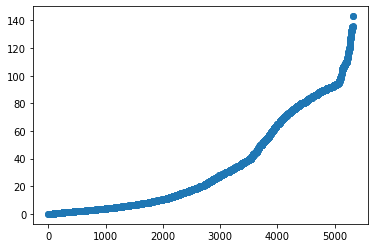

In [67]:

# Viewing a general plot of the critical temperatures
true_y_sample = sorted(Y_test)
scale = np.linspace(0,5316,5316)

plt.scatter(scale,true_y_sample)

This plot of a sample of the critical temperature distribution in the semiconducters shows that there appears to be three sections. The first section is the superconducters  with a critical temperature at ~40 Kelvin. Then there is a group between 40 and ~100 Kelvin, and one more that exists past that. 

This information on the groups is important in the selection of the model. Based on this distribution, it can be theorized that a typical linear classifier would do poorly as it would likely predict well for the middle group, but loe accuracy on the other two as their slopes are much different. An idea of a classifier that can be used is a KNN Regressor, as it has as better chance of picking up on the local changes in each group, being that looking at neighbor data points is how it does its modeling. Becuase of this that will be the frist model that will be tested, although linear models will still be run for a point of comparison.

### KNN Regressor Model

In [68]:
# basic kNN classifier
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,Y_train)
predicted_y = knn.predict(X_test)
print(f'The r^2 value for this model is {knn.score(X_test,Y_test)}')


The r^2 value for this model is 0.8780693480492001


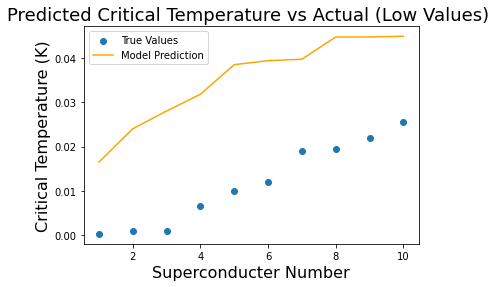

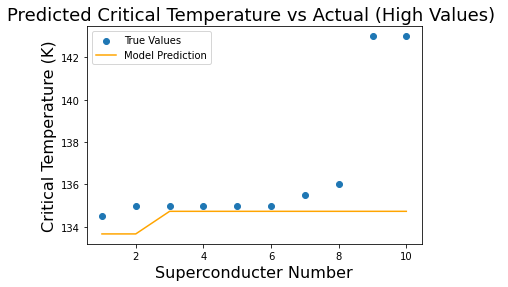

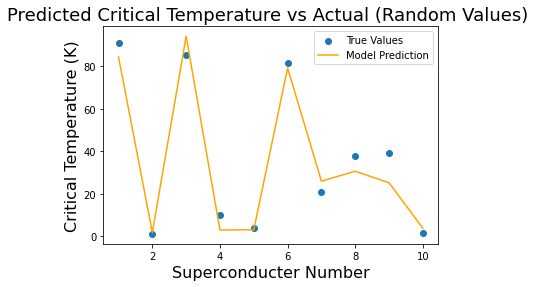

In [69]:
predicted_y_sample_low = sorted(predicted_y)[:10]
true_y_sample_low = sorted(Y_test)[:10]
predicted_y_sample_high = sorted(predicted_y)[-10:]
true_y_sample_high = sorted(Y_test)[-10:]
predicted_y_sample = predicted_y[:10]
true_y_sample = Y_test[:10]


scale = np.linspace(1,10,10)

def graph(pred_sample,true_sample,section):
    plt.scatter(scale,true_sample,label='True Values')
    plt.plot(scale,pred_sample,color='orange',label='Model Prediction')
    plt.ylabel('Critical Temperature (K)',size=16)
    plt.xlabel('Superconducter Number',size=16)
    plt.title(f'Predicted Critical Temperature vs Actual ({section}) ',size=18)
    plt.legend()
    plt.show()

graph(predicted_y_sample_low,true_y_sample_low,'Low Values')
graph(predicted_y_sample_high,true_y_sample_high,'High Values')
graph(predicted_y_sample,true_y_sample,'Random Values')


These graphs show the results of the KNN Regression Model. They show that the model tends to struggle with the lowest values in the dataset, but does much better on the higher values. Additonly, it shows with a random selection of points it does a good job at classifying most of them. Potential improvements for this model could look at imporoving the perfomence at those lower values.

### Other Linear Models

In [70]:
# basic linear regression model
linreg = LinearRegression().fit(X_train, Y_train)
predicted_y_lin = linreg.predict(X_test)
print(f'The r^2 for this model is {linreg.score(X_test,Y_test)}')

The r^2 for this model is 0.568218707439538


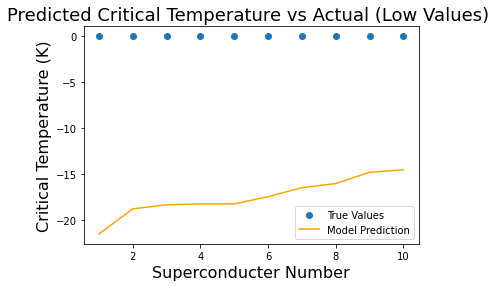

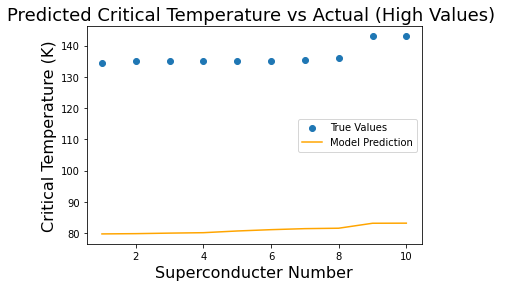

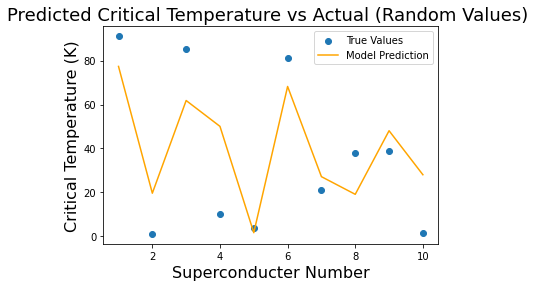

In [71]:


predicted_y_sample_low = sorted(predicted_y_lin)[:10]
true_y_sample_low = sorted(Y_test)[:10]
predicted_y_sample_high = sorted(predicted_y_lin)[-10:]
true_y_sample_high = sorted(Y_test)[-10:]
predicted_y_sample = predicted_y_lin[:10]
true_y_sample = Y_test[:10]


scale = np.linspace(1,10,10)

# uses graph function from the KNN model
graph(predicted_y_sample_low,true_y_sample_low,'Low Values')
graph(predicted_y_sample_high,true_y_sample_high,'High Values')
graph(predicted_y_sample,true_y_sample,'Random Values')

These graphs show the results of the linear regression model. As predicted above this model deos a worse job predicting the critical temperature than the KNN model. From the graphs it seems that it tended to undershoot most of the values, whether that be the low or high ones. This might be something that can be tweaked away in another model, but for now it serves as a good point of comparison for the KNN model.

In [72]:
def varying_alpha(alpha,model):
    if model == 'Ridge':
        linridge = Ridge(alpha=alpha).fit(X_train,Y_train)
        print(f'The r^2 score for an alpha of {alpha} is {linridge.score(X_test,Y_test)}')
    if model == 'Lasso':
        linlasso = Lasso(alpha=alpha,max_iter=10000).fit(X_train,Y_train)
        print(f'The r^2 score for an alpha of {alpha} is {linlasso.score(X_test,Y_test)}')


In [73]:

# Ridge Regression model
varying_alpha(.1,'Ridge')
varying_alpha(1,'Ridge')
varying_alpha(10,'Ridge')

The r^2 score for an alpha of 0.1 is 0.5682263481445473
The r^2 score for an alpha of 1 is 0.5682833122155588
The r^2 score for an alpha of 10 is 0.5680002753323434


In [74]:
# Lasso regression 
varying_alpha(.1,'Lasso')
varying_alpha(1,'Lasso')
varying_alpha(5,'Lasso')


The r^2 score for an alpha of 0.1 is 0.5611829732244906
The r^2 score for an alpha of 1 is 0.5360047687654055
The r^2 score for an alpha of 5 is 0.31421728234531543
